# Objective
With the Given Wether pattern and soil Conditions we have to predict the yeild that can be made by a pirticular crop

- Problueum Statement : Regression porbleum - We need to predict yeild
- Target Variable : Yeild

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Building Model

## Nesessary Libreries

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

## Understanding Data

In [3]:
dataset = pd.read_csv("Extracted Data/final_yeild_data.csv")
dataset.head()

,State,District,Crop,Season,Area,Area Units,Production,Production Units,Yield,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,Latitude,Longitude,Start_Year,End_Year,temperature,humidity,rainfall
0,andhra pradesh,adilabad,banana,Whole Year,225.0,Hectare,5063.0,Tonnes,22.502222,17.208297,12.372029,272.95082,8.805699,19.4,79.3,2001,2002,28.357692,11.958846,128.995385
1,andhra pradesh,adilabad,banana,Whole Year,13.0,Hectare,317.0,Tonnes,24.384615,17.208297,12.372029,272.95082,8.805699,19.4,79.3,2002,2003,28.503846,12.115769,152.118077
2,andhra pradesh,adilabad,banana,Whole Year,110.0,Hectare,1540.0,Tonnes,14.000000,17.208297,12.372029,272.95082,8.805699,19.4,79.3,2003,2004,28.261154,12.392308,135.080769
3,andhra pradesh,anantapur,banana,Whole Year,1582.0,Hectare,462.0,Tonnes,0.292035,17.208297,12.372029,272.95082,8.805699,14.6,77.0,2001,2002,27.529615,12.326923,59.225385
4,andhra pradesh,anantapur,banana,Whole Year,19.0,Hectare,1006.0,Tonnes,52.947368,17.208297,12.372029,272.95082,8.805699,14.6,77.0,2002,2003,28.160385,12.270385,47.055000


## Missing Values

In [4]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

temperature 0.034  % missing values
humidity 0.034  % missing values
rainfall 0.034  % missing values


We have to find the relationship between the target Variable and missing Values to know the impact of missing values on target variable

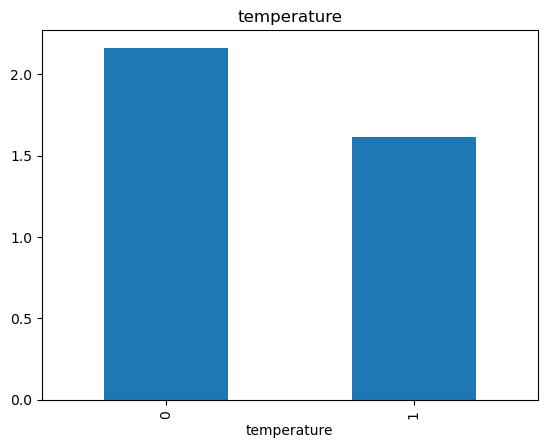

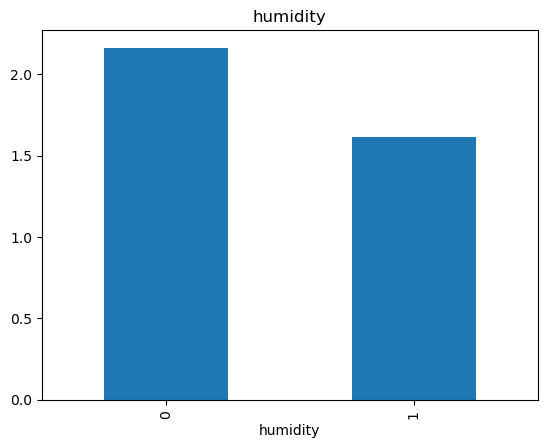

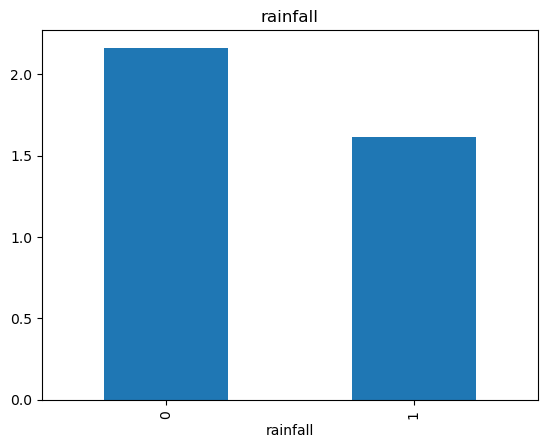

In [5]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean Yeild where the information is missing or present
    data.groupby(feature)['Yield'].median().plot.bar()
    plt.title(feature)
    plt.show()

Since the missing values show some significant impact on the yeild produced, we have to replace them by mean aggregate of values of the state they belong to fill them with relevent values.

In [6]:
# Calculate the mean values for each state
state_means = dataset.groupby('State')[['temperature', 'humidity', 'rainfall']].mean()

In [7]:
# Define a function to fill missing values with the state's mean values
def fill_missing_values(row):
    if pd.isnull(row['temperature']):
        row['temperature'] = state_means.loc[row['State'], 'temperature']
    if pd.isnull(row['humidity']):
        row['humidity'] = state_means.loc[row['State'], 'humidity']
    if pd.isnull(row['rainfall']):
        row['rainfall'] = state_means.loc[row['State'], 'rainfall']
    return row

In [8]:
# Apply the function to each row
dataset = dataset.apply(fill_missing_values, axis=1)

check again for the missing values

In [9]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values
if len(features_with_na)==0:
    print("There are no missing values")
for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

There are no missing values


We have eliminated the missing values

Removing Unwanted Columns

- Some attributes like state name, district name has no relevence with respect to training a ml model that predict yeild due to which we have extracted related wether and soil parameters of the region over the given period of time to get more relevent information So we have to remove the unwanted columns like, state, district, start_year, end_year, latitude, longitude

In [4]:
columns_to_remove = ['State','District','Start_Year','End_Year','Latitude','Longitude']
dataset.drop(columns=columns_to_remove, inplace=True)
dataset.head()

,Crop,Season,Area,Area Units,Production,Production Units,Yield,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,temperature,humidity,rainfall
0,banana,Whole Year,225.0,Hectare,5063.0,Tonnes,22.502222,17.208297,12.372029,272.95082,8.805699,28.357692,11.958846,128.995385
1,banana,Whole Year,13.0,Hectare,317.0,Tonnes,24.384615,17.208297,12.372029,272.95082,8.805699,28.503846,12.115769,152.118077
2,banana,Whole Year,110.0,Hectare,1540.0,Tonnes,14.000000,17.208297,12.372029,272.95082,8.805699,28.261154,12.392308,135.080769
3,banana,Whole Year,1582.0,Hectare,462.0,Tonnes,0.292035,17.208297,12.372029,272.95082,8.805699,27.529615,12.326923,59.225385
4,banana,Whole Year,19.0,Hectare,1006.0,Tonnes,52.947368,17.208297,12.372029,272.95082,8.805699,28.160385,12.270385,47.055000


## Numerical Features

In [5]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  10


,Area,Production,Yield,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,temperature,humidity,rainfall
0,225.0,5063.0,22.502222,17.208297,12.372029,272.95082,8.805699,28.357692,11.958846,128.995385
1,13.0,317.0,24.384615,17.208297,12.372029,272.95082,8.805699,28.503846,12.115769,152.118077
2,110.0,1540.0,14.000000,17.208297,12.372029,272.95082,8.805699,28.261154,12.392308,135.080769
3,1582.0,462.0,0.292035,17.208297,12.372029,272.95082,8.805699,27.529615,12.326923,59.225385
4,19.0,1006.0,52.947368,17.208297,12.372029,272.95082,8.805699,28.160385,12.270385,47.055000


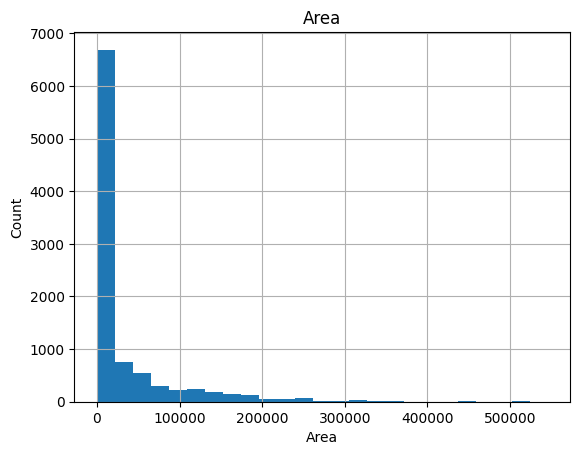

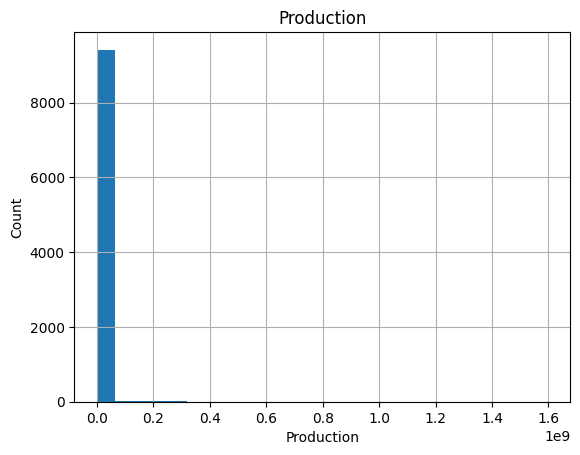

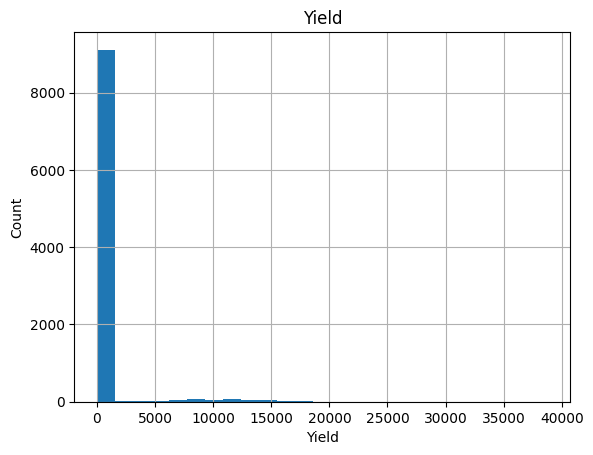

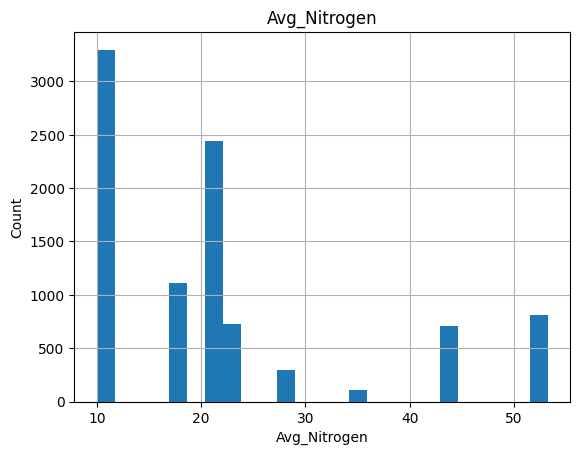

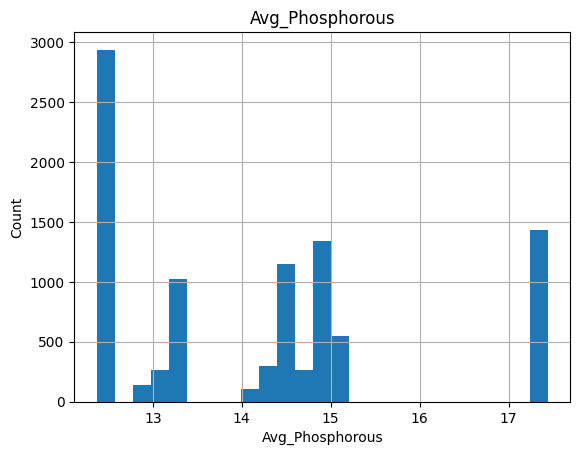

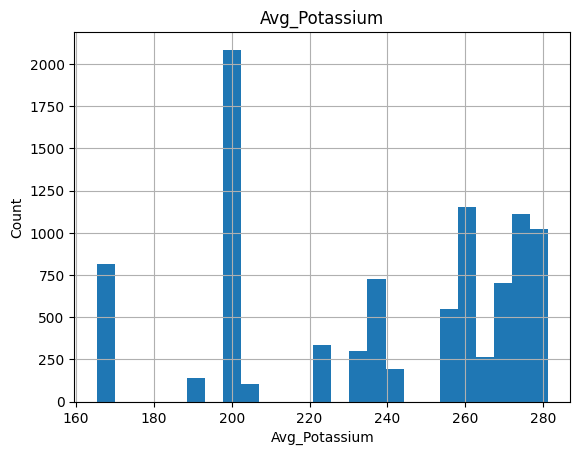

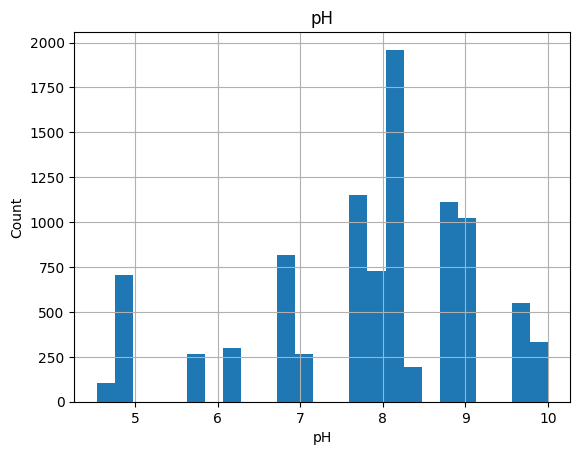

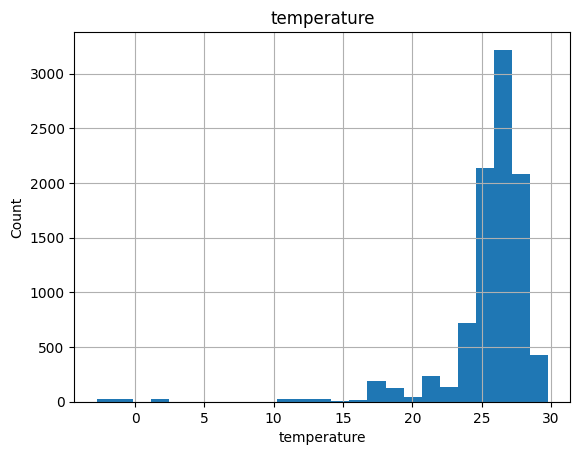

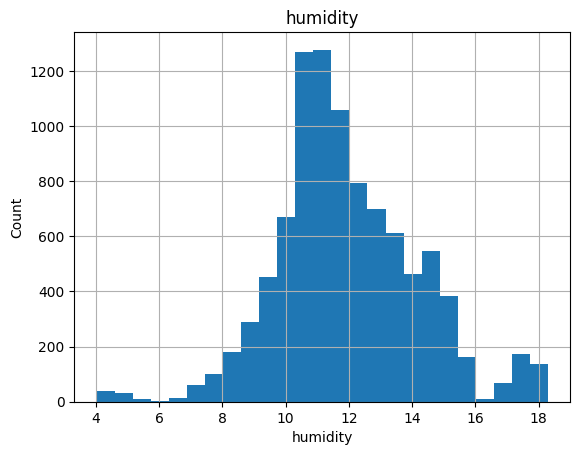

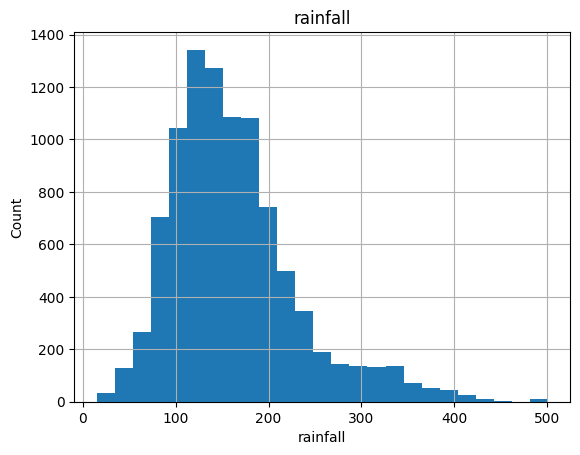

In [6]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in numerical_features:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

We will drop area and production as yeild  is direct representation of these features 
- yeild = production/area

In [7]:
col = ['Area','Production']
dataset.drop(columns=col, inplace=True)
dataset.head()

,Crop,Season,Area Units,Production Units,Yield,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,temperature,humidity,rainfall
0,banana,Whole Year,Hectare,Tonnes,22.502222,17.208297,12.372029,272.95082,8.805699,28.357692,11.958846,128.995385
1,banana,Whole Year,Hectare,Tonnes,24.384615,17.208297,12.372029,272.95082,8.805699,28.503846,12.115769,152.118077
2,banana,Whole Year,Hectare,Tonnes,14.000000,17.208297,12.372029,272.95082,8.805699,28.261154,12.392308,135.080769
3,banana,Whole Year,Hectare,Tonnes,0.292035,17.208297,12.372029,272.95082,8.805699,27.529615,12.326923,59.225385
4,banana,Whole Year,Hectare,Tonnes,52.947368,17.208297,12.372029,272.95082,8.805699,28.160385,12.270385,47.055000


## Inference

Since the numerical features are skewed We have to apply log normal Transformation

In [8]:
dataset.head()

,Crop,Season,Area Units,Production Units,Yield,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,temperature,humidity,rainfall
0,banana,Whole Year,Hectare,Tonnes,22.502222,17.208297,12.372029,272.95082,8.805699,28.357692,11.958846,128.995385
1,banana,Whole Year,Hectare,Tonnes,24.384615,17.208297,12.372029,272.95082,8.805699,28.503846,12.115769,152.118077
2,banana,Whole Year,Hectare,Tonnes,14.000000,17.208297,12.372029,272.95082,8.805699,28.261154,12.392308,135.080769
3,banana,Whole Year,Hectare,Tonnes,0.292035,17.208297,12.372029,272.95082,8.805699,27.529615,12.326923,59.225385
4,banana,Whole Year,Hectare,Tonnes,52.947368,17.208297,12.372029,272.95082,8.805699,28.160385,12.270385,47.055000


## Categorical Features

In [9]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
print(f"There are {len(categorical_features)} Categorical Features")

There are 4 Categorical Features


In [10]:
dataset[categorical_features].head()

,Crop,Season,Area Units,Production Units
0,banana,Whole Year,Hectare,Tonnes
1,banana,Whole Year,Hectare,Tonnes
2,banana,Whole Year,Hectare,Tonnes
3,banana,Whole Year,Hectare,Tonnes
4,banana,Whole Year,Hectare,Tonnes


In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is Crop and number of categories are 5
The feature is Season and number of categories are 6
The feature is Area Units and number of categories are 1
The feature is Production Units and number of categories are 3


Since the Area unit is same for every crop we will remove the attribute and Season as we are delaing with temperature and soil parameters to predict yeild

In [12]:
col = ['Area Units','Season']
dataset.drop(columns=col, inplace=True)

In [13]:
categorical_features = [feature for feature in categorical_features if feature not in col]

Find out the relationship between categorical variable and dependent feature Yeild

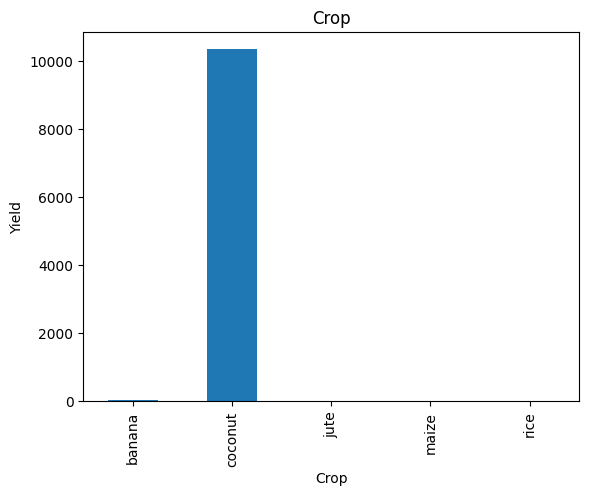

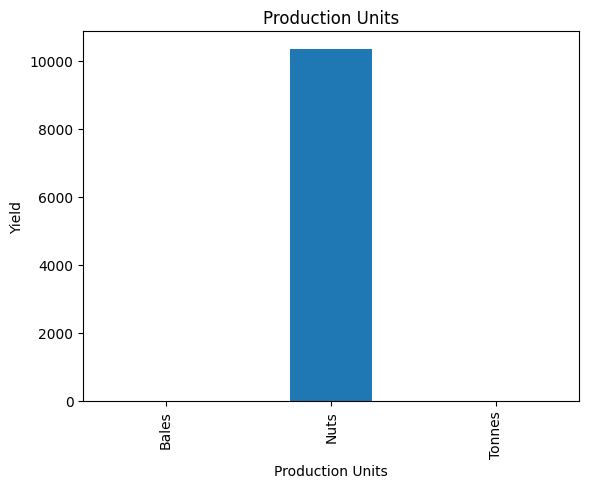

In [14]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Yield'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.title(feature)
    plt.show()

#### Understanding Production Units and Crops

In [15]:
# Group by 'Production Units' and get unique crops for each unit
production_unit_groups = dataset.groupby('Production Units')['Crop'].unique().apply(list).reset_index()

# Flatten the list for each production unit
production_unit_groups = production_unit_groups.explode('Crop')
print(production_unit_groups)

  Production Units     Crop
0            Bales     jute
1             Nuts  coconut
2           Tonnes   banana
2           Tonnes    maize
2           Tonnes     rice


Since there is difference in units We find large deviation in yeild We have get them on common Unit for comparision
- 5000 nuts = 1 Tonne
- 4 bales jute = 1 Tonne

In [16]:
# Define conversion rates
nuts_to_tonnes = 1 / 5000
bales_jute_to_tonnes = 1 / 4

In [17]:
# Conversion function
def convert_to_tonnes(row):
    if row['Production Units'] == 'Nuts':
        row['Yield'] *= nuts_to_tonnes
        row['Production Units'] = 'Tonnes'
    elif row['Production Units'] == 'Bales':
        row['Yield'] *= bales_jute_to_tonnes
        row['Production Units'] = 'Tonnes'
    return row

In [18]:
# Apply conversion
dataset = dataset.apply(convert_to_tonnes, axis=1)

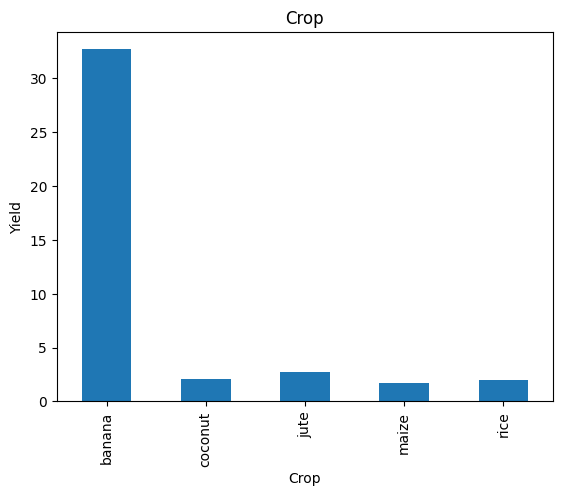

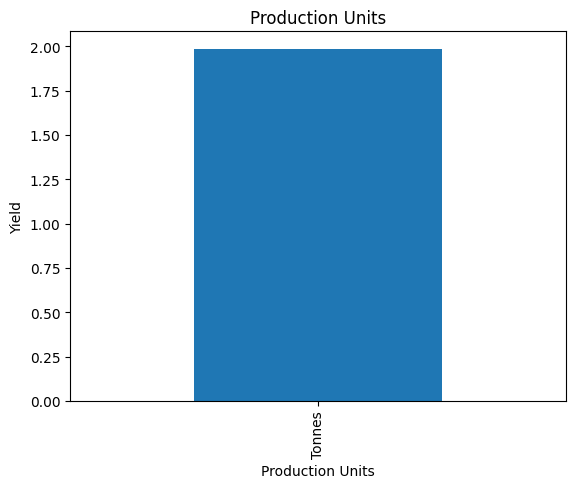

In [19]:
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['Yield'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Yield')
    plt.title(feature)
    plt.show()

Remove production units.

In [20]:
col = ['Production Units']
dataset.drop(columns=col, inplace=True)

In [21]:
dataset.head()

,Crop,Yield,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,temperature,humidity,rainfall
0,banana,22.502222,17.208297,12.372029,272.95082,8.805699,28.357692,11.958846,128.995385
1,banana,24.384615,17.208297,12.372029,272.95082,8.805699,28.503846,12.115769,152.118077
2,banana,14.000000,17.208297,12.372029,272.95082,8.805699,28.261154,12.392308,135.080769
3,banana,0.292035,17.208297,12.372029,272.95082,8.805699,27.529615,12.326923,59.225385
4,banana,52.947368,17.208297,12.372029,272.95082,8.805699,28.160385,12.270385,47.055000


Due to extreame Outliers It is possible to have Infinity Values. So we have to clean them

In [22]:
numeric_cols = dataset.select_dtypes(include=[np.number]).columns

dataset = dataset[np.isfinite(np.log(dataset[numeric_cols])).all(1)]

## Inference :
Finally these are the values we take from the user.
We have to use One hot Encodeing for Crops and Production Units

# Preprocessing Data

-  lognormal Transformation of numerical features
-  on-hot encoding crops

Nesessary Libraries

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
import joblib

Define Preprocessor Object

In [24]:
def log_normal_transform(x):
    return np.log1p(x)

def get_preprocessor():
    numerical_columns = ["Avg_Nitrogen","Avg_Phosphorous","Avg_Potassium","pH","temperature","humidity","rainfall"]
    categorical_columns = ["Crop"]

    num_pipeline = Pipeline(
        steps = [
            ('log_normal', FunctionTransformer(log_normal_transform)),
            ("scaler",StandardScaler())
        ]
    )

    cat_pipeline = Pipeline(
        steps = [
            ("one_hot_encoder",OneHotEncoder()),
            ("scaler",StandardScaler(with_mean=False))
        ]
    )

    preprocessor = ColumnTransformer(
        [
            ("num_pipeline",num_pipeline,numerical_columns),
            ("cat_pipelines",cat_pipeline,categorical_columns)
        ]
    )

    return preprocessor

In [25]:
target_column = ['Yield']

features = dataset.drop(columns=target_column, axis=1)

target = dataset[target_column]

Transform target Column

In [26]:
target = np.log(target)

Split the Data

In [27]:
train_features,test_features, train_target, test_target =train_test_split(features,target,test_size=0.2,random_state=42)

In [28]:
train_features.head()

,Crop,Avg_Nitrogen,Avg_Phosphorous,Avg_Potassium,pH,temperature,humidity,rainfall
2906,maize,21.841577,14.446976,261.884793,7.632099,25.745769,10.915769,206.069615
7148,rice,21.841577,14.446976,261.884793,7.632099,26.366538,11.108077,135.486538
5763,maize,11.576962,12.438334,199.934423,8.250204,24.851154,10.291923,210.531923
7818,maize,11.576962,12.438334,199.934423,8.250204,24.196154,10.863846,200.796154
7369,maize,10.000000,14.639175,201.030928,7.121429,25.274615,9.865769,103.035000


In [29]:
train_target.head()

,Yield
2906,0.510568
7148,-0.132467
5763,0.378066
7818,0.405465
7369,1.098612


Preprocess Data

In [30]:
preprocessor = get_preprocessor()
train_x = preprocessor.fit_transform(train_features)

Save preprocessor

In [32]:
joblib.dump(preprocessor, "models/preprocessor.pkl")

['models/preprocessor.pkl']

In [33]:
test_x = preprocessor.transform(test_features)

In [34]:
train_y = train_target.to_numpy()
test_y = test_target.to_numpy()

## Train The Model

### Importing nesessary models

In [36]:

from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

We will use RandomizedSearchCv to get the best hyperparameters for each model which uses cross fold validation to get the best parameters

We will train multiple ml algorithms and use the best model for our training

In [37]:
estimators =[
    ("RandomForest", RandomForestRegressor()),
    ("DecisionTree", DecisionTreeRegressor()),
    ("GradientBoosting", GradientBoostingRegressor()),
    ("LinearRegression", LinearRegression()),
    ("XGBoost", XGBRegressor()),
    ("AdaBoost", AdaBoostRegressor())
]

In [38]:
params_dict = {
    'RandomForest' : {
        "n_estimators": range(100, 1000),
        "max_depth": range(3, 10),
        "min_samples_split": range(2, 20),
        "min_samples_leaf": range(1, 10)
    },
    'DecisionTree' : {
        "max_depth": range(3, 10),
        "min_samples_split": range(2, 20),
        "min_samples_leaf": range(1, 10)
    },
    'GradientBoosting' : {
        "n_estimators": range(100, 1000),
        "learning_rate": np.arange(0.01, 1.0, 0.1),
        "max_depth": range(3, 10)
    },
    'LinearRegression' : {
        "fit_intercept": [True, False]
    },
    'XGBoost' : {
        "n_estimators": range(100, 1000),
        "learning_rate": np.arange(0.01, 1.0, 0.1),
        "max_depth": range(3, 10),
        "colsample_bytree": np.arange(0.1, 1.0, 0.1)
    },
    'AdaBoost' : {
        "n_estimators": range(100, 1000),
        "learning_rate": np.arange(0.01, 1.0, 0.1)
    }
}

### Initiate Random Sear CV

In [39]:
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Dictionary to store best models and their RMSE
best_estimators = {}
rmse_scores = {}

In [40]:
for name, estimator in estimators:
    random_search = RandomizedSearchCV(
        estimator=estimator,
        param_distributions=params_dict[name],
        n_iter=10,
        scoring=rmse_scorer,
        cv=5,
        random_state=42  # Ensure reproducibility
    )
    print("Initiated RandomizedSearchCV for {} model".format(name))
    random_search.fit(train_x, train_y)
    print("Completed RandomizedSearchCV for {} model".format(name))
    
    # Store the best estimator
    best_estimators[name] = random_search.best_estimator_

    # Save the best estimator
    model_filename = f'models/best_{name}_model.pkl'
    joblib.dump(random_search.best_estimator_, model_filename)
    print("Saved best {} model to {}".format(name, model_filename))

    
    # Calculate RMSE on validation data (or train data if no validation set is available)
    best_rmse = -random_search.best_score_  # Since scoring is neg_root_mean_squared_error
    print("Best Parameters:\n", random_search.best_params_)
    rmse_scores[name] = -(best_rmse)
    print("Best RMSE for {}: {}".format(name, -(best_rmse)))

Initiated RandomizedSearchCV for RandomForest model
Completed RandomizedSearchCV for RandomForest model
Saved best RandomForest model to models/best_RandomForest_model.pkl
Best Parameters:
 {'n_estimators': 637, 'min_samples_split': 10, 'min_samples_leaf': 9, 'max_depth': 3}
Best RMSE for RandomForest: 0.5483771567009692
Initiated RandomizedSearchCV for DecisionTree model
Completed RandomizedSearchCV for DecisionTree model
Saved best DecisionTree model to models/best_DecisionTree_model.pkl
Best Parameters:
 {'min_samples_split': 15, 'min_samples_leaf': 7, 'max_depth': 3}
Best RMSE for DecisionTree: 0.5548078412900277
Initiated RandomizedSearchCV for GradientBoosting model
Completed RandomizedSearchCV for GradientBoosting model
Saved best GradientBoosting model to models/best_GradientBoosting_model.pkl
Best Parameters:
 {'n_estimators': 443, 'max_depth': 7, 'learning_rate': 0.81}
Best RMSE for GradientBoosting: 0.5560052463218325
Initiated RandomizedSearchCV for LinearRegression model
C

Compare Results of each model

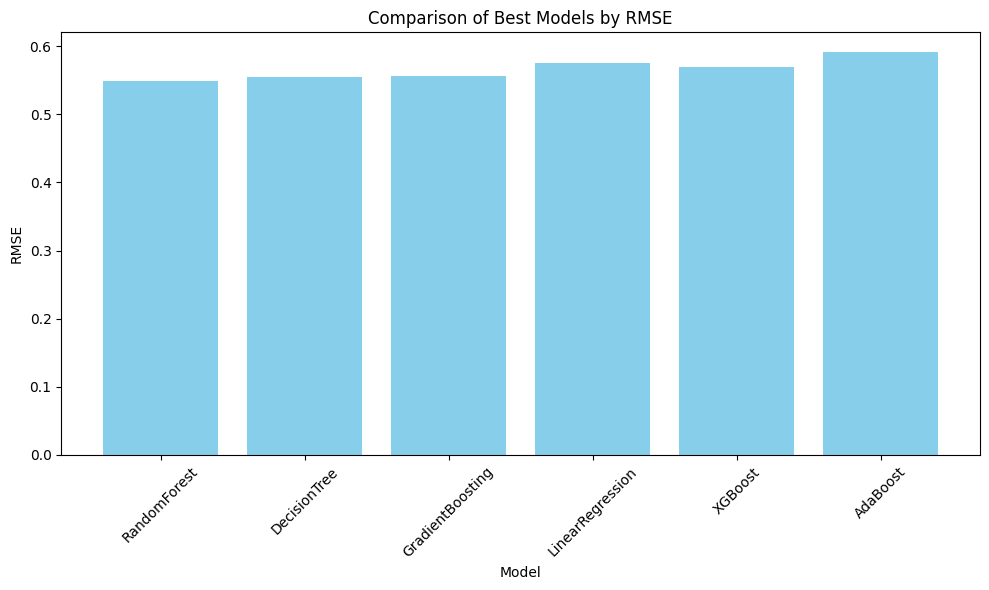

In [41]:
# Convert the results to a DataFrame for easy plotting
results_df = pd.DataFrame(list(rmse_scores.items()), columns=['Model', 'RMSE'])

# Plot the RMSE scores
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Comparison of Best Models by RMSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since RandomForest model is the top performer, we will use it for yeild prediction